In [3]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import joblib
from sklearn.metrics import roc_curve, auc

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kkbmu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kkbmu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kkbmu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# Data is loaded
data = pd.read_csv(r"C:\Users\kkbmu\OneDrive\Desktop\mini project\Code\train2.csv")

In [5]:
# Data preprocessing

'''Here URLs,non-alphanumeric characters and whitespaces are removed. The cleaned text is then converted to lowercase and tokenised. 
   Stop words are removed from those tokens and then lemmatised. lemmatised tokens are then joined and returned.'''

stop_words = set(stopwords.words('english'))
stop_words.update(["like", "u", "û_", "amp"])
lemmatizer = WordNetLemmatizer()

# preprocessing function
def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+|\b\d+\b|\W", ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text= text.strip() 
    text = text.lower()  
    tokens = word_tokenize(text)  
    filtered_tokens = [word for word in tokens if word not in stop_words] 
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return ' '.join(lemmatized_tokens) 
data['text'] = data['text'].apply(preprocess_text)

In [6]:
# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size=0.1, random_state=43)

min_df: 1, Testing Accuracy: 0.84
min_df: 3, Testing Accuracy: 0.83
min_df: 5, Testing Accuracy: 0.84
min_df: 7, Testing Accuracy: 0.85
min_df: 10, Testing Accuracy: 0.83
min_df: 15, Testing Accuracy: 0.81


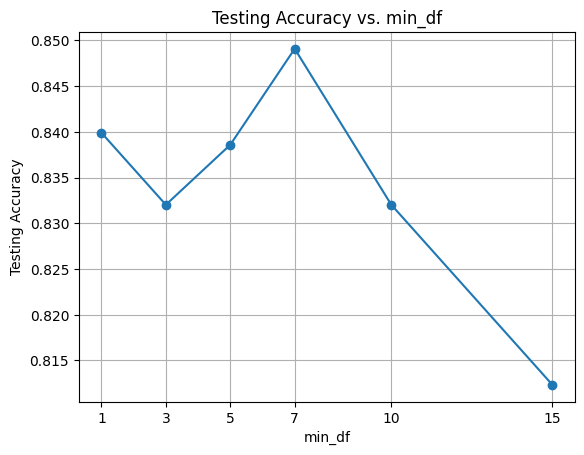

In [64]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define the range of min_df values to search over
min_df_values = [1, 3, 5, 7, 10, 15]  # Adjust the range as needed
accuracies = []

for min_df in min_df_values:
    # Initialize TfidfVectorizer with the current min_df value
    tfidf_vectorizer = TfidfVectorizer(min_df=min_df)
    
    # Fit-transform the training data
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    
    # Transform the testing data (using the same vectorizer)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    
    # Training the model
    logistic_clf_tfidf = LogisticRegression(solver="liblinear")
    logistic_clf_tfidf.fit(X_train_tfidf, y_train)
    
    # Evaluation
    # Testing accuracy
    y_test_log = logistic_clf_tfidf.predict(X_test_tfidf)
    test_accuracy = accuracy_score(y_test, y_test_log)
    
    print("min_df: {}, Testing Accuracy: {:.2f}".format(min_df, test_accuracy))
    accuracies.append(test_accuracy)

# Plot the testing accuracy for each value of min_df
plt.plot(min_df_values, accuracies, marker='o')
plt.title('Testing Accuracy vs. min_df')
plt.xlabel('min_df')
plt.ylabel('Testing Accuracy')
plt.xticks(min_df_values)
plt.grid(True)
plt.show()


In [55]:
# Feature extraction and vectorisation 
'''tfidf vectoriser is used. min_df is a parameter that specifies minimum number of document a word must appear in to be included in  the matrix.'''

tfidf_vectorizer = TfidfVectorizer(min_df=7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


LOGISTIC REGRESSION
Training Accuracy:0.85
Testing Accuracy : 0.85
Classification Report for Testing Data:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87       406
           1       0.88      0.78      0.83       356

    accuracy                           0.85       762
   macro avg       0.85      0.84      0.85       762
weighted avg       0.85      0.85      0.85       762



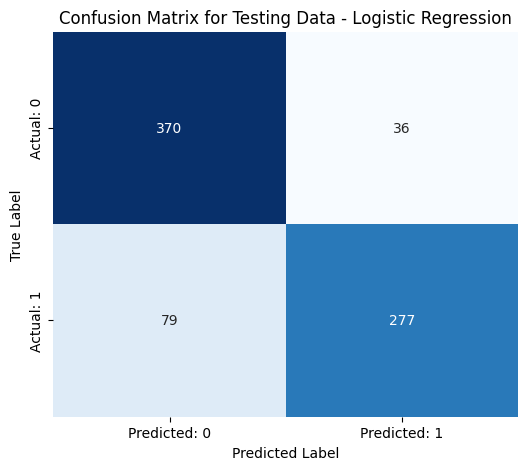

In [56]:
''' Logistic'''

print("LOGISTIC REGRESSION")

# Training the model
logistic_clf_tfidf = LogisticRegression(solver="liblinear")
logistic_clf_tfidf.fit(X_train_tfidf, y_train)

# Evaluation

# Training accuracy
y_train_log = logistic_clf_tfidf.predict(X_train_tfidf)
train_accuracy = accuracy_score(y_train, y_train_log)
print("Training Accuracy:{:.2f}".format(train_accuracy))

# Testing accuracy
y_test_log = logistic_clf_tfidf.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_log)

print("Testing Accuracy : {:.2f}".format(test_accuracy))

# Classification report for testing data
print("Classification Report for Testing Data:\n", classification_report(y_test, y_test_log))

# Plotting the confusion matrix
''' Confusion matrix gives the number of actual and predicted outputs.'''

conf_matrix = confusion_matrix(y_test, y_test_log)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted: 0', 'Predicted: 1'],
            yticklabels=['Actual: 0', 'Actual: 1'])
plt.title("Confusion Matrix for Testing Data - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

SVM
Training Accuracy (SVM): 0.90
Testing Accuracy (SVM): 0.83
Classification Report for Testing Data (SVM):
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       406
           1       0.84      0.79      0.82       356

    accuracy                           0.83       762
   macro avg       0.83      0.83      0.83       762
weighted avg       0.83      0.83      0.83       762



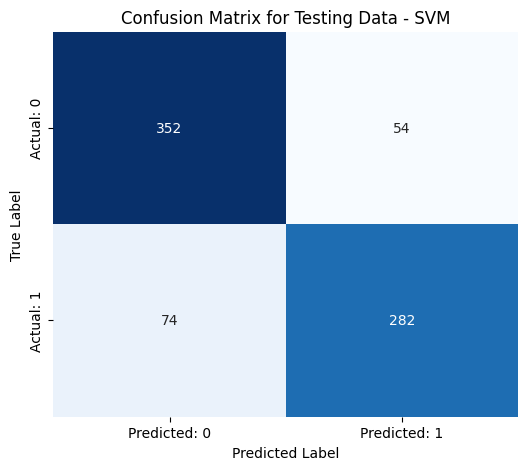

In [57]:
''' SVM '''
print("SVM")

''' Class weights are given due to the slight imbalance in the dataset'''
# Training the model
svc_clf_tfidf = SVC(class_weight={0: 0.4, 1: 0.6},probability=True)
svc_clf_tfidf.fit(X_train_tfidf, y_train)


# Evaluation

# Training accuracy
y_train_svm = svc_clf_tfidf.predict(X_train_tfidf)
train_accuracy_svm = accuracy_score(y_train, y_train_svm)
print("Training Accuracy (SVM): {:.2f}".format(train_accuracy_svm))

# Testing accuracy
y_test_svm = svc_clf_tfidf.predict(X_test_tfidf)
test_accuracy_svm = accuracy_score(y_test, y_test_svm)
print("Testing Accuracy (SVM): {:.2f}".format(test_accuracy_svm))

# Classification report for testing data
print("Classification Report for Testing Data (SVM):\n", classification_report(y_test, y_test_svm))

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted: 0', 'Predicted: 1'],
            yticklabels=['Actual: 0', 'Actual: 1'])
plt.title("Confusion Matrix for Testing Data - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

RANDOM FOREST
Training Accuracy (Random Forest): 0.86
Testing Accuracy (Random Forest): 0.81
Classification Report for Testing Data (Random Forest):
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       406
           1       0.82      0.77      0.79       356

    accuracy                           0.81       762
   macro avg       0.82      0.81      0.81       762
weighted avg       0.82      0.81      0.81       762



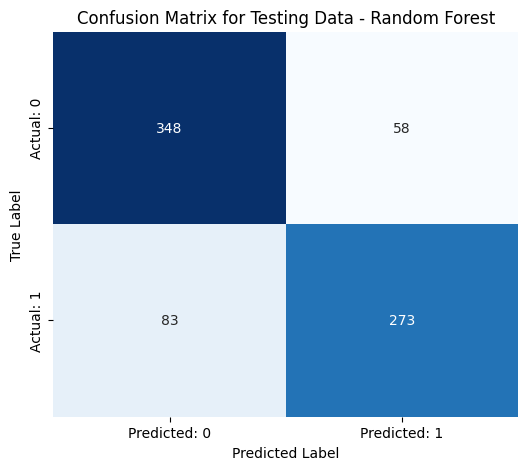

In [58]:
'''Random Forest'''

print("RANDOM FOREST")

# Training the model
rf_clf_tfidf = RandomForestClassifier(min_samples_split=29, min_samples_leaf=3)
rf_clf_tfidf.fit(X_train_tfidf, y_train)

# Evaluation

# Training accuracy
y_train_rf = rf_clf_tfidf.predict(X_train_tfidf)
train_accuracy_rf = accuracy_score(y_train, y_train_rf)
print("Training Accuracy (Random Forest): {:.2f}".format(train_accuracy_rf))

# Testing accuracy
y_test_rf = rf_clf_tfidf.predict(X_test_tfidf)
test_accuracy_rf = accuracy_score(y_test, y_test_rf)
print("Testing Accuracy (Random Forest): {:.2f}".format(test_accuracy_rf))

# Classification report for testing data
print("Classification Report for Testing Data (Random Forest):\n", classification_report(y_test, y_test_rf))

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted: 0', 'Predicted: 1'],
            yticklabels=['Actual: 0', 'Actual: 1'])
plt.title("Confusion Matrix for Testing Data - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



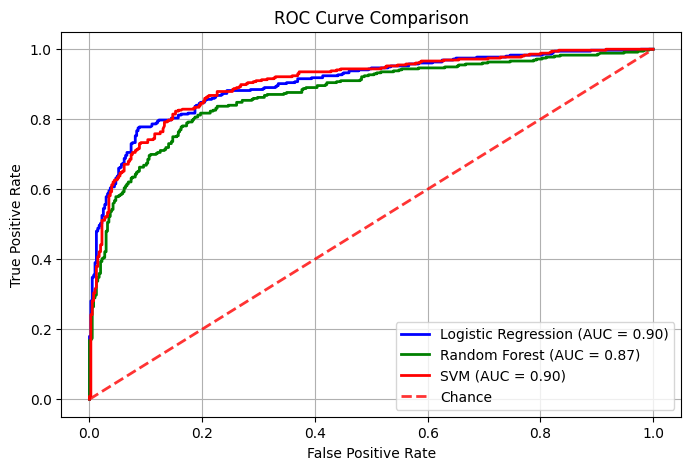

In [41]:
# Compute ROC curve and AUC for each model
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_clf_tfidf.predict_proba(X_test_tfidf)[:,1])
logistic_auc = auc(logistic_fpr, logistic_tpr)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_clf_tfidf.predict_proba(X_test_tfidf)[:,1])
rf_auc = auc(rf_fpr, rf_tpr)

sv_fpr, sv_tpr, _ = roc_curve(y_test, svc_clf_tfidf.predict_proba(X_test_tfidf)[:,1])
sv_auc = auc(sv_fpr, sv_tpr)

# Plotting ROC curves
plt.figure(figsize=(8, 5))
plt.plot(logistic_fpr, logistic_tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {logistic_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, color='green', lw=2, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(sv_fpr, sv_tpr, color='red', lw=2, label=f'SVM (AUC = {sv_auc:.2f})')

# Plotting the ROC curve for a random classifier
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Saving the model and vectoriser as pickle file.
''' This is needed for loading the model and vectoriser into the UI module. It is converted to pickle format and saved. 
    We only save the logistic regression model as it gives the best accuracy so far.'''

with open('finalmodel.pkl', 'wb') as f:
    pickle.dump(logistic_clf_tfidf, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)



In [42]:
''' Ensemble '''

print("ENSEMBLE")

# Create ensemble model and train
ensemble_clf = VotingClassifier(estimators=[('logistic', logistic_clf_tfidf), ('svm', svc_clf_tfidf)], voting='hard')
ensemble_clf.fit(X_train_tfidf, y_train)

# Evaluation

# Training accuracy
train_accuracy = ensemble_clf.score(X_train_tfidf, y_train)
print("Training Accuracy: {:.2f}".format(train_accuracy))

# Testing accuracy
test_accuracy = ensemble_clf.score(X_test_tfidf, y_test)
print("Testing Accuracy: {:.2f}".format(test_accuracy))

# Classification report for testing data
y_test_pred = ensemble_clf.predict(X_test_tfidf)
print("Classification Report for Testing Data:\n", classification_report(y_test, y_test_pred))


ENSEMBLE
Training Accuracy: 0.86
Testing Accuracy: 0.84
Classification Report for Testing Data:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       406
           1       0.88      0.76      0.82       356

    accuracy                           0.84       762
   macro avg       0.85      0.84      0.84       762
weighted avg       0.85      0.84      0.84       762

